# EDA 
series_idの確認

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append("/kaggle/src/dss_utils")

from dss_metrics import score

# Config

In [3]:
output_dir = os.path.join("/kaggle", "working", "_oof")
exp_name = "exp006_addlayer"

In [4]:
for i in range(5):
    print("fold", i)
    oof_df = pd.concat(
        [pd.read_parquet(os.path.join(output_dir, exp_name, f"oof_df_fold{i}.parquet"))]
        ,axis=0
    )


fold 0


fold 1
fold 2
fold 3
fold 4


In [5]:
train_event_df = pd.read_csv("/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv")

In [6]:
series_df = pd.read_parquet("/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet")

In [7]:
print(set(series_df["series_id"].unique()) - set(train_event_df["series_id"].unique()))
print(set(train_event_df["series_id"].unique()) - set(series_df["series_id"].unique()))

print(set(series_df["series_id"].unique()) - set(oof_df["series_id"].unique()))
print(set(oof_df["series_id"].unique()) - set(series_df["series_id"].unique()))

print(set(train_event_df["series_id"].unique()) - set(oof_df["series_id"].unique()))
print(set(oof_df["series_id"].unique()) - set(train_event_df["series_id"].unique()))


set()
set()
{'cca14d1966c1', '31011ade7c0a', '35826366dfc7', '655f19eabf1e', 'de6fedfb6139', 'a9a2f7fac455', 'f8a8da8bdd00', '8becc76ea607', '349c5562ee2c', 'dacc6d652e35', '0d0ad1e77851', '8f6f15b9f598', 'a261bc4b7470', 'bccf2f2819f8', 'b4b75225b224', 'a2b0a64ec9cf', 'd2fef7e4defd', 'fbf33b1a2c10', 'e30cb792a2bc', '3be1545083b7', '2654a87be968', '04f547b8017d', '4a31811f3558', '83fa182bec3a', 'efbfc4526d58', 'd043c0ca71cd', '9ddd40f2cb36', '89bd631d1769', '7504165f497d', '29d3469bd15d', '10469f6765bf', '90eac42a9ec9', '9277be28a1cf', '519ae2d858b0', '9b9cd7b7af8c', 'e586cbfa7762', 'ea0770830757', 'ad425f3ee76d', '703b5efa9bc1', 'ee4e0e3afd3d', '612aa8ba44e2', '5acc9d63b5fd', 'c8053490cec2', 'c908a0ad3e31', 'bfe41e96d12f', '5f76965e10cf', 'fa149c3c4bde', '752900afe3a6', '1955d568d987', 'af91d9a50547', 'def21f50dd3c', '292a75c0b94e', '0f572d690310', '51b23d177971', '137771d19ca2', 'f0482490923c', '1762ab70ec76', 'df33ae359fb5', '05e1944c3818', '5aad18e7ce64', 'e867b5133665', '1e6717d93c

In [8]:
print(len(set(series_df["series_id"].unique()) - set(oof_df["series_id"].unique())))
print(len(set(train_event_df["series_id"].unique())- set(oof_df["series_id"].unique())))

222
222


In [9]:
preprocessed_df = pd.read_parquet("/kaggle/input/preprocessed_train_series_le_fold.parquet")

In [10]:
print(set(series_df["series_id"].unique()) - set(preprocessed_df["series_id"].unique()))
print(set(preprocessed_df["series_id"].unique()) - set(series_df["series_id"].unique()))

set()
set()


In [11]:
key_df = preprocessed_df[["series_date_key", "series_date_key_str"]].drop_duplicates()
key_df = key_df.reset_index(drop=True)
key_df["series_id"], key_df["date"] = (
    key_df["series_date_key_str"].str.split("_", 1).str
)
key_df = key_df.drop(columns=["series_date_key_str"], axis=1)

In [12]:
print(set(key_df["series_id"].unique()) - set(series_df["series_id"].unique()))
print(set(series_df["series_id"].unique()) - set(key_df["series_id"].unique()))

set()
set()


In [13]:
not_include_series = list(set(series_df["series_id"].unique()) - set(oof_df["series_id"].unique()))
print(len(not_include_series))

222


In [17]:
oof_df["split_series"], oof_df["split_date"] = (
    oof_df["series_date_key_str"].str.split("_", 1).str
)

In [18]:
oof_df["split_date"].unique()

array(['2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17',
       '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21',
       '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25',
       '2018-08-26', '2018-08-27', '2018-08-28', '2018-08-29',
       '2018-08-30', '2018-08-31', '2018-09-01', '2018-09-02',
       '2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06',
       '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
       '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
       '2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
       '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
       '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
       '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
       '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
       '2019-02-13', '2019-02-14', '2019-02-15', '2019-

In [20]:
not_include_series = list(set(series_df["series_id"].unique()) - set(oof_df["split_series"].unique()))
print(len(not_include_series))

222


In [14]:
series_date_keys = oof_df["series_date_key"].unique()
print(len(series_date_keys))
for key in series_date_keys:
    oof_seires_date = oof_df[oof_df["series_date_key"] == key]
    if len(oof_seires_date) > 17280:
        print(key, len(oof_seires_date))

1537
5 17282
9 17282
14 17282
22 17282
72 17286
87 17282
89 17284
165 17300
166 17306
184 17284
188 17284
193 17284
199 17288
203 17286
207 17314
280 17294
281 17296
391 17284
393 17282
398 17282
653 17284
857 17286
1114 17288
1118 17284
1126 17286
1135 17290
1139 17284
1141 17284
1148 17286
1165 17284
2024 17284
2045 17288
2051 17282
2053 17282
2055 18000
2060 17282
2260 17284
2265 17286
2271 17282
2290 17284
2394 17282
2396 17282
2409 17286
2412 17282
2413 17284
2420 17282
2429 18000
2432 17284
2436 17282
2656 17284
2992 17282
3002 17296
3011 17286
3015 17282
3021 17286
3022 17284
3165 17282
3167 17282
3171 17282
3173 17282
3177 17286
3179 17282
3184 17282
3185 17282
3223 17290
3228 17282
3420 17288
3426 17284
3440 17302
3442 17282
3560 17282
3562 17282
3566 17284
3573 17282
3575 17282
3579 17282
3612 17284
3618 17282
3693 17282
3707 17282
3716 17284
3728 17302
3729 17328
3999 17334
4688 17282
4701 17284
4708 17284
4738 17296
4740 18000
4803 17282
4806 17282
4810 17286
4817 17282
506

cca14d1966c1


,series_id,series_date_key,date,fold,step
95469223,cca14d1966c1,5753,2018-03-19,0,0
95469224,cca14d1966c1,5753,2018-03-19,0,1
95469225,cca14d1966c1,5753,2018-03-19,0,2
95469226,cca14d1966c1,5753,2018-03-19,0,3
95469227,cca14d1966c1,5753,2018-03-19,0,4
...,...,...,...,...,...
95845608,cca14d1966c1,5775,2018-04-10,0,376375
95845609,cca14d1966c1,5775,2018-04-10,0,376376
95845610,cca14d1966c1,5775,2018-04-10,0,376377
95845611,cca14d1966c1,5775,2018-04-10,0,376378


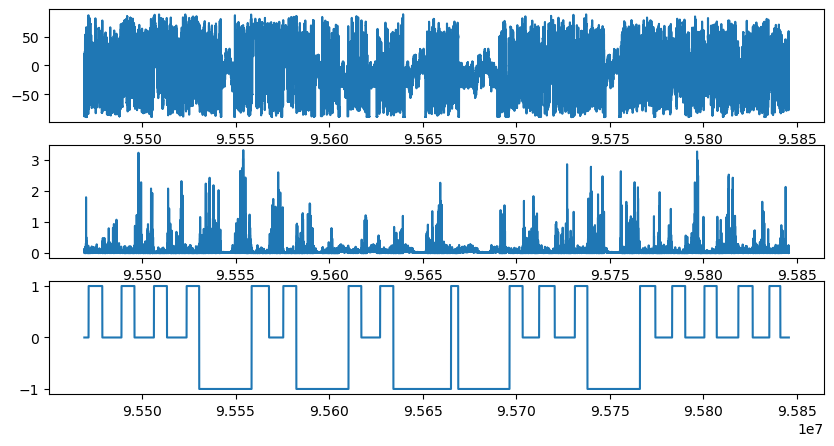

31011ade7c0a


,series_id,series_date_key,date,fold,step
26182578,31011ade7c0a,1574,2017-08-15,3,0
26182579,31011ade7c0a,1574,2017-08-15,3,1
26182580,31011ade7c0a,1574,2017-08-15,3,2
26182581,31011ade7c0a,1574,2017-08-15,3,3
26182582,31011ade7c0a,1574,2017-08-15,3,4
...,...,...,...,...,...
26747413,31011ade7c0a,1607,2017-09-17,3,564835
26747414,31011ade7c0a,1607,2017-09-17,3,564836
26747415,31011ade7c0a,1607,2017-09-17,3,564837
26747416,31011ade7c0a,1607,2017-09-17,3,564838


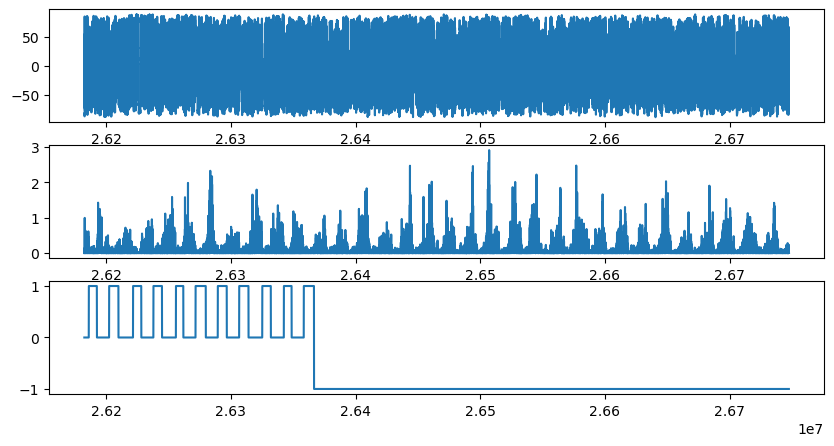

35826366dfc7


,series_id,series_date_key,date,fold,step
28410632,35826366dfc7,1708,2017-10-04,1,0
28410633,35826366dfc7,1708,2017-10-04,1,1
28410634,35826366dfc7,1708,2017-10-04,1,2
28410635,35826366dfc7,1708,2017-10-04,1,3
28410636,35826366dfc7,1708,2017-10-04,1,4
...,...,...,...,...,...
28842293,35826366dfc7,1733,2017-10-29,1,431635
28842294,35826366dfc7,1733,2017-10-29,1,431636
28842295,35826366dfc7,1733,2017-10-29,1,431637
28842296,35826366dfc7,1733,2017-10-29,1,431638


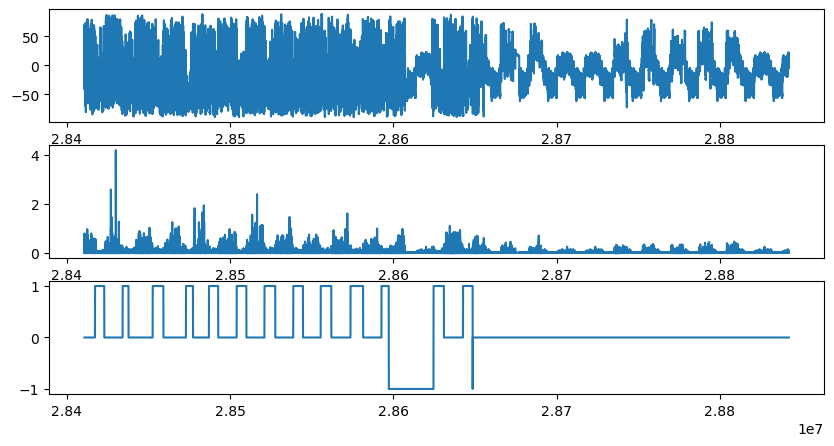

655f19eabf1e


,series_id,series_date_key,date,fold,step
48165107,655f19eabf1e,2903,2017-11-09,3,0
48165108,655f19eabf1e,2903,2017-11-09,3,1
48165109,655f19eabf1e,2903,2017-11-09,3,2
48165110,655f19eabf1e,2903,2017-11-09,3,3
48165111,655f19eabf1e,2903,2017-11-09,3,4
...,...,...,...,...,...
48552462,655f19eabf1e,2925,2017-12-01,3,387355
48552463,655f19eabf1e,2925,2017-12-01,3,387356
48552464,655f19eabf1e,2925,2017-12-01,3,387357
48552465,655f19eabf1e,2925,2017-12-01,3,387358


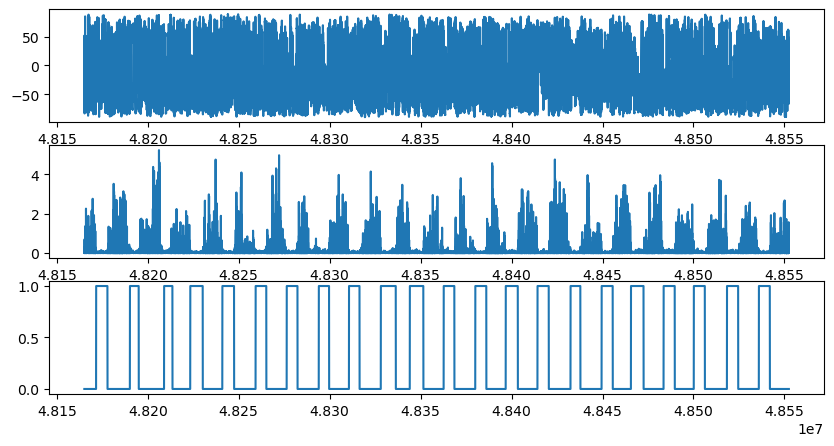

In [21]:
display_col = ["series_id", "series_date_key", "date","fold", "step"]
for idx, series_id in enumerate(not_include_series):
    if idx > 3:
        break
    print(series_id)
    df = preprocessed_df[preprocessed_df["series_id"] == series_id]
    display(df[display_col])
    plt.figure(figsize=(10, 5))
    plt.subplot(3, 1, 1)
    plt.plot(df["anglez"])
    plt.subplot(3, 1, 2)
    plt.plot(df["enmo"])
    plt.subplot(3, 1, 3)
    plt.plot(df["event"])
    plt.show()
    